In [2]:
import pandas as pd 
df_ads = pd.read_csv('data/易速鲜花微信软文.csv') # 读入数据
df_ads.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401


E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36190 (\N{CJK UNIFIED IDEOGRAPH-8D5E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27983 (\N{CJK UNIFIED IDEOGRAPH-6D4F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabtools.py

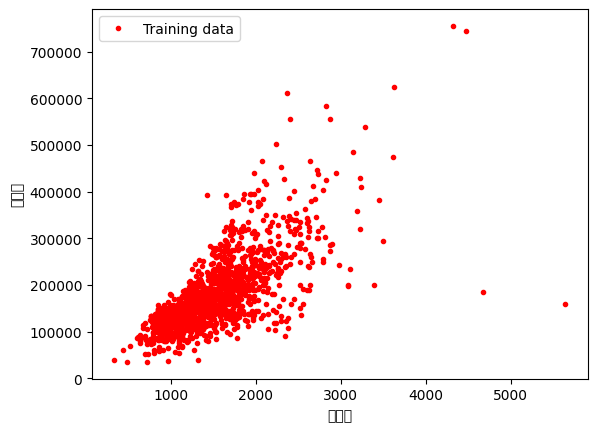

In [3]:

import matplotlib.pyplot as plt # Matplotlib – Python画图工具库
import seaborn as sns # Seaborn – 统计学数据可视化工具库

plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27983 (\N{CJK UNIFIED IDEOGRAPH-6D4F}) missing from font(s) DejaVu Sans.

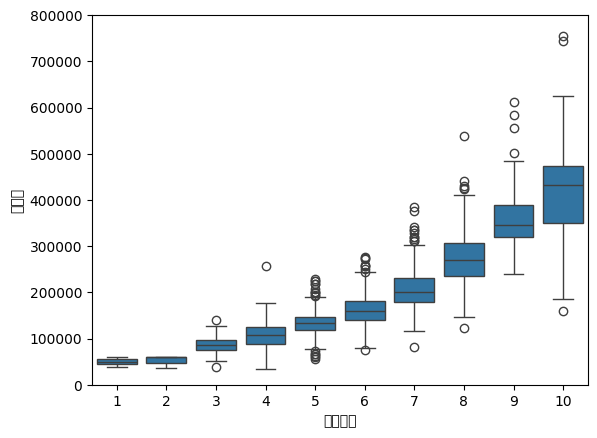

In [4]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

In [5]:
df_ads.isna().sum() # NaN出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [6]:
df_ads = df_ads.dropna() # 把出现了NaN的数据行删掉

In [10]:
X = df_ads.drop(['浏览量'],axis=1) # 特征集，Drop掉标签相关字段
X.head() # 显示前几行数据


,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [11]:
y = df_ads.浏览量 # 标签集
y.head() #显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

In [12]:
#将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split #导入train_test_split工具
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)